# Finding the Max Sharpe Ratio Portfolio!

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [18]:
#Max Sharpe Ratio

from scipy.optimize import minimize
import numpy as np
import pandas as pd

def msr(riskfree_rate, er, cov):
    """
    riskfree_rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    
    weights_sum_to_1= {
        'type':'eq',
        'fun':lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negativo of the Sharpe ratio, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return - (r - riskfree_rate) / vol
    
    # minimizar ratio de sharpe negativo = maximizar ratio de sharpe
    results = minimize(neg_sharpe_ratio, init_guess,
                      args=(riskfree_rate, er, cov, ), method="SLSQP",
                      options={'disp':False},
                      constraints=(weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

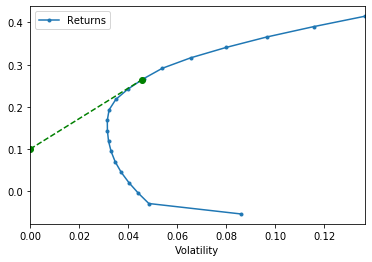

In [19]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

# Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]

ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")


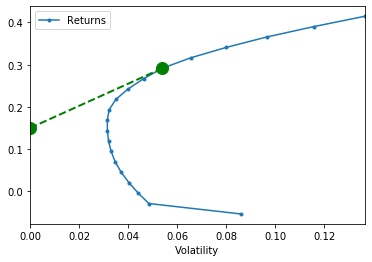

In [28]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate = 0.15)